In [588]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [589]:
grid = nc.Dataset('Downloads/CUGN_line_90.nc')
depth=grid.variables['depth'][:]

temp = grid.variables['temperature'][:] #(50, 45917)
sal = grid.variables['salinity'][:] #(50, 45917)
time = grid.variables['time'] #(45917,)

In [590]:
#find data points in 2019
dtime = nc.num2date(time[:],time.units)
collect = []
for i in range(len(dtime)):
    as_string = str(dtime[i])
    year = as_string[0:4]
    if year == "2019":
        collect.append(i)
start_2019 = min(collect)
end_2019 = max(collect) + 1

In [591]:
def find_standard(input):   
    #query temperature and salinity to be at depth = 10 m
    temp_at_10_m = temp[input]
    salinity_at_10_m = sal[input]

    #query temperature at 10 m and salinity at 10 m for only 2019 data 
    temp_at_10_m_2019 = (temp_at_10_m[start_2019: end_2019])
    salinity_at_10_m_2019 = (salinity_at_10_m[start_2019: end_2019])

    #keep only floats
    list_to_delete = []
    for i in range(len(temp_at_10_m_2019)): 
        temp_check = isinstance(temp_at_10_m_2019[i],float)
        sal_check = isinstance(salinity_at_10_m_2019[i],float)
        if not (temp_check and sal_check): 
            list_to_delete.append(i)
    for i in list_to_delete: 
        temp_at_10_m_2019 = np.delete(temp_at_10_m_2019, i)
        salinity_at_10_m_2019 = np.delete(salinity_at_10_m_2019, i)

    #get rid of nan
    new_delete = []
    for i in range(len(temp_at_10_m_2019)): 
        if (np.isnan(temp_at_10_m_2019[i])): 
            new_delete.append(i)
    for i in range(len(salinity_at_10_m_2019)): 
        if (np.isnan(salinity_at_10_m_2019[i])):
            new_delete.append(i)
    for i in new_delete: 
        temp_at_10_m_2019 = np.delete(temp_at_10_m_2019, i)
        salinity_at_10_m_2019 = np.delete(salinity_at_10_m_2019, i)
    t = []
    for i in range(len(salinity_at_10_m_2019)): 
        if np.isnan(salinity_at_10_m_2019[i]):
            t.append(i)
    for i in t[::-1]: 
        temp_at_10_m_2019 = np.delete(temp_at_10_m_2019, i)
        salinity_at_10_m_2019 = np.delete(salinity_at_10_m_2019, i)

    #converting to list
    salinity_at_10_m_2019 = np.ma.array(salinity_at_10_m_2019).tolist()
    temp_at_10_m_2019 = np.ma.array(temp_at_10_m_2019).tolist()

    #temperatrue standardization 
    temp_sd = np.std(temp_at_10_m_2019)
    temp_total = np.sum(temp_at_10_m_2019)
    temp_size = len(temp_at_10_m_2019)
    temp_mean = temp_total / temp_size
    standard_temp = []
    for i in range(len(temp_at_10_m_2019)): 
        z = (temp_at_10_m_2019[i] - temp_mean) / (temp_sd)
        standard_temp.append(z)

    #salinity standardization 
    sal_sd = np.std(salinity_at_10_m_2019)
    sal_total = np.sum(salinity_at_10_m_2019)
    sal_size = len(salinity_at_10_m_2019)
    sal_mean = sal_total / sal_size
    standard_sal = []
    for i in range(len(salinity_at_10_m_2019)): 
        z = (salinity_at_10_m_2019[i] - sal_mean) / (sal_sd)
        standard_sal.append(z)
        
    return (standard_temp, standard_sal)

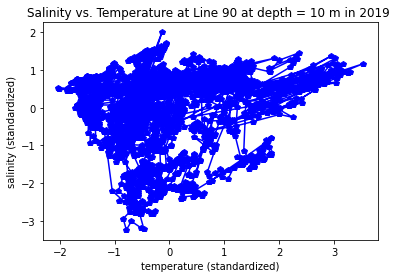

In [592]:
import matplotlib.pyplot as plt

x1 = find_standard(0)[0]
y1 = find_standard(0)[1]

plt.plot(x1, y1, '-p', color = 'blue')

plt.xlabel('temperature (standardized)')
plt.ylabel('salinity (standardized)')
plt.title('Salinity vs. Temperature at Line 90 at depth = 10 m in 2019 ')

plt.show()

In [593]:
def find_correlation(input):
    x_values = find_standard(input)[0]
    y_values = find_standard(input)[1]

    correlation_matrix = np.corrcoef(x_values, y_values)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    return r_squared

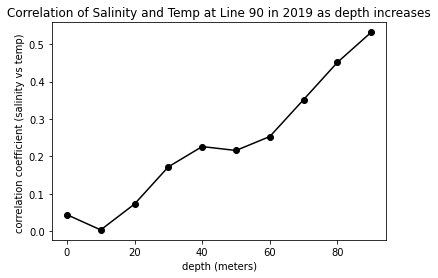

In [594]:
correlations = []
for i in range(10): 
    correlations.append((find_correlation(i)))
    
plt.plot(range(0,100,10), correlations, '-o', color = 'black')

plt.xlabel('depth (meters)')
plt.ylabel('correlation coefficient (salinity vs temp) ')
plt.title('Correlation of Salinity and Temp at Line 90 in 2019 as depth increases')

plt.show()